In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


In [3]:
data = pd.read_csv('survey_final.csv',low_memory=False)

In [4]:
data.describe(include='all')

Year Hobbyist  ConvertedComp        Country  \
count   303591.000000   303546   1.511720e+05         302658   
unique            NaN        5            NaN            247   
top               NaN      Yes            NaN  United States   
freq              NaN   201542            NaN          65182   
mean      2018.548149      NaN   1.058168e+05            NaN   
std          1.005437      NaN   2.347656e+05            NaN   
min       2017.000000      NaN   0.000000e+00            NaN   
25%       2018.000000      NaN   2.497200e+04            NaN   
50%       2019.000000      NaN   5.499600e+04            NaN   
75%       2019.000000      NaN   9.500000e+04            NaN   
max       2020.000000      NaN   2.000000e+06            NaN   

       DatabaseDesireNextYear DatabaseWorkedWith                DevType  \
count                  200167             216942                 258928   
unique                  15642              11958                  29323   
top                     MySQL              MySQL  Developer, full-stack   
freq                    12150              17360                  12857   
mean                      NaN                NaN                    NaN   
std                       NaN                NaN                    NaN   
min                       NaN                NaN                    NaN   
25%                       NaN                NaN                    NaN   
50%                       NaN                NaN                    NaN   
75%                       NaN                NaN                    NaN   
max                       NaN                NaN                    NaN   

                                          EdLevel          Employment  \
count                                      289916              297748   
unique                                         23                   8   
top     Bachelor‚'s degree (BA, BS, B.Eng., etc.)  Employed full-time   
freq                                        43658              216353   
mean                                          NaN                 NaN   
std                                           NaN                 NaN   
min                                           NaN                 NaN   
25%                                           NaN                 NaN   
50%                                           NaN                 NaN   
75%                                           NaN                 NaN   
max                                           NaN                 NaN   

                    JobSat LanguageDesireNextYear LanguageWorkedWith  \
count               225834                 248070             257052   
unique                  20                  73293              66267   
top     Slightly satisfied                 Python               Java   
freq                 48149                   3825               3083   
mean                   NaN                    NaN                NaN   
std                    NaN                    NaN                NaN   
min                    NaN                    NaN                NaN   
25%                    NaN                    NaN                NaN   
50%                    NaN                    NaN                NaN   
75%                    NaN                    NaN                NaN   
max                    NaN                    NaN                NaN   

                   OrgSize                                     UndergradMajor  \
count               226578                                             248486   
unique                  13                                                 33   
top     20 to 99 employees  Computer science, computer engineering, or sof...   
freq                 50379                                             129132   
mean                   NaN                                                NaN   
std                    NaN                                                NaN   
min                    NaN            

In [5]:
# Make all data field consistent betweem years
data['EdLevel'].replace({"Master's degree (M.A., M.S., M.Eng., MBA, etc.)":"Master's degree",
                          "Bachelor's degree (B.A., B.S., B.Eng., etc.)":"Bachelor's degree",
                          "Secondary school": "Secondary school",
                          "Professional degree (JD, MD, etc.)":"Professional degree",
                          "Some college/university study without earning a degree":"Some college/university study without earning a bachelor's degree",
                          "Associate degree (A.A., A.S., etc.)":"Associate degree", 
                          "Other doctoral degree (Ph.D., Ed.D., etc.)":"Doctoral degree",
                          "Bachelor's degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
                          "Master's degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
                          "Other doctoral degree (Ph.D, Ed.D., etc.)":"Doctoral degree",
                          "Bachelor‚'s degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
                          "Master‚'s degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
                          "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary school", 
                          " ":"I prefer not to answer",
                          "Full-stack developer":"I prefer not to answer" }, inplace=True)

data['OrgSize'].replace({'2-9 employees' : '2 to 9 employees',
                        'Fewer than 10 employees': '2 to 9 employees'}, inplace = True)

data['UndergradMajor'].replace({"Computer science, computer engineering, or software engineering":"Computer science",
                                "Another engineering discipline (such as civil, electrical, mechanical, etc.)":"Another engineering discipline",
                                "A humanities discipline (such as literature, history, philosophy, etc.)":"Humanities",
                                "A health science (such as nursing, pharmacy, radiology, etc.)":"Health science",
                                "Information systems, information technology, or system administration":"Information systems",
                                "A natural science (such as biology, chemistry, physics, etc.)":"Natural science",
                                "Fine arts or performing arts (such as graphic design, music, studio art, etc.)":"Fine arts or performing arts",
                                "A social science (such as anthropology, psychology, political science, etc.)":"Social science",
                                "A business discipline (such as accounting, finance, marketing, etc.)":"Business",
                                "Another engineering discipline (ex. civil, electrical, mechanical)":"Another engineering discipline",
                                "A business discipline (ex. accounting, finance, marketing)":"Business",
                                "A natural science (ex. biology, chemistry, physics)":"Natural science",
                                "A social science (ex. anthropology, psychology, political science)":"Social science",
                                "A humanities discipline (ex. literature, history, philosophy)":"Humanities",
                                "Fine arts or performing arts (ex. graphic design, music, studio art)":"Fine arts or performing arts",
                                "A health science (ex. nursing, pharmacy, radiology)":"Health science",
                                "Computer science or software engineering":"Computer science",
                                "A non-computer-focused engineering discipline":"Another engineering discipline",
                                "A social science":"Social science","A natural science":"Natural science",
                                "A business discipline":"Business","Information technology, networking, or system administration":"Information systems","Fine arts or performing arts":"Fine arts or performing arts","Management information systems":"Information systems","A humanities discipline":"Humanities","Psychology":"Social science","A health science":"Health science"}, inplace=True)


data["Hobbyist"].replace({"Yes, both":"Yes", "Yes, I program as a hobby":"Yes", "Yes, I contribute to open source projects":"Yes"}, inplace=True)


def jobsat(x):
    if (x == 'Extremely satisfied') | (x == 10):
        return 9
    elif x == 'Very satisfied':
        return 8
    elif x == 'Moderately satisfied':
        return 7
    elif x == 'Slightly satisfied':
        return 6
    elif x == 'Neither satisfied nor dissatisfied':
        return 5
    elif x == 'Slightly dissatisfied':
        return 4
    elif x == 'Moderately dissatisfied':
        return 3
    elif x == 'Very dissatisfied':
        return 2
    elif (x == 'Extremely dissatisfied') | (x == 0):
        return 1
    else:
        return x

data['JobSat'] = data['JobSat'].apply(jobsat)   


def yearcodeconvert(x):
    if type(x) == str:
        a = re.findall('[0-9]+', x)
        if len(a) == 2:
            return int(a[1])
        if int(a[0]) >=30:
            return 30
        else:
            return int(x)
    else:
        return x
data['YearsCodePro'].replace({'Less than 1 year':1,
                              'Less than a year':1,
                              '20 or more years':20,
                              '30 or more years':30,
                              'More than 50 years':30}, inplace = True)
                             
data['YearsCodePro'] = data['YearsCodePro'].apply(yearcodeconvert)

data['OrgSize'].replace({"20 to 99 employees": 99, "100 to 499 employees":499, "10,000 or more employees":10000,"1,000 to 4,999 employees":4999,"2 to 9 employees":9,"10 to 19 employees":19, "500 to 999 employees":999,"5,000 to 9,999 employees":9999, "Just me - I am a freelancer, sole proprietor, etc.":1,"I don't know":np.nan,"I prefer not to answer":np.nan }, inplace=True)
data['EdLevel'].replace({"I never completed any formal education":0, "Primary/elementary school":9,"Secondary school":12, "Professional degree":17, "Associate degree":14, "Some college/university study without earning a bachelor's degree":14, "Bachelor's degree" :16,  "Master's degree":18, "Doctoral degree":21, "I prefer not to answer":np.nan}, inplace=True)

In [6]:
data['OrgSize'].value_counts()

99.0       50379
499.0      42430
10000.0    31733
4999.0     23848
9.0        23088
19.0       23005
999.0      14571
9999.0      9414
1.0         6560
Name: OrgSize, dtype: int64

In [7]:
data['EdLevel'].value_counts()

16.0    130943
18.0     65218
14.0     45331
12.0     28272
21.0      7644
9.0       5066
17.0      4160
0.0       2172
Name: EdLevel, dtype: int64

In [8]:
# save data of each year for processing
data_2017 = data[data['Year']==2017]
data_2018 = data[data['Year']==2018]
data_2019 = data[data['Year']==2019]
data_2020 = data[data['Year']==2020]

## DevType separation

### 2017

In [9]:
mask = data_2017['DevType'].str.contains(r'data|machine|business', case = False,na=False)
df = data_2017[mask].copy()
# remove all space at beginning of the text
df['DevType'].replace('^\s+', '', regex=True, inplace=True) #front
# Split the text by semi colon
split_2017 = df['DevType'].str.get_dummies(sep='; ')
# as 2017 have different choice from 18,19 and 20, we will merge the choices to align it with the rest
split_2017['Data scientist or machine learning specialist'] = split_2017['Data scientist'] | split_2017['Machine learning specialist']
# Get the desired columns
select_type_2017 = ['Data scientist or machine learning specialist',
                   'Database administrator']
candidate_2017 = (np.sum(split_2017.loc[:,select_type_2017],axis = 1) != 0).index

In [10]:
split_2017.head()

Data scientist  Database administrator  \
252218               1                       0   
252234               0                       0   
252237               0                       1   
252240               0                       1   
252262               1                       1   

        Desktop applications developer  DevOps specialist  \
252218                               0                  0   
252234                               0                  0   
252237                               0                  0   
252240                               0                  1   
252262                               1                  1   

        Developer with a statistics or mathematics background  \
252218                                                  0       
252234                                                  1       
252237                                                  0       
252240                                                  0       
252262                                                  0       

        Embedded applications/devices developer  Graphic designer  \
252218                                        0                 0   
252234                                        0                 0   
252237                                        0                 0   
252240                                        0                 0   
252262                                        0                 1   

        Graphics programming  Machine learning specialist  Mobile developer  \
252218                     0                            0                 0   
252234                     0                            1                 0   
252237                     0                            0                 0   
252240                     0                            0                 0   
252262                     0                            0                 1   

        Other  Quality assurance engineer  Systems administrator  \
252218      1                           0                      0   
252234      0                           0                      0   
252237      0                           0                      0   
252240      0                           0                      0   
252262      0                           0                      1   

        Web developer  Data scientist or machine learning specialist  
252218              0                                              1  
252234              0                                              1  
252237              1                                              0  
252240              1                                              0  
252262              1                                              1

### 2018

In [11]:
mask = data_2018['DevType'].str.contains(r'data|machine|business', case = False,na=False)
df = data_2018[mask].copy()
# Replace all space at beginning of the text
df['DevType'].replace('^\s+', '', regex=True, inplace=True) #front
# Split the text by semi colon
split_2018 = df['DevType'].str.get_dummies(sep=';')
# Get the desired columns
select_type_2018 = ['Data or business analyst',
                    'Data scientist or machine learning specialist',
                    'Database administrator']
candidate_2018 = (np.sum(split_2018.loc[:,select_type_2018],axis = 1) != 0).index

### 2019

In [12]:
mask = data_2019['DevType'].str.contains(r'data|machine|business', case = False,na=False)
df = data_2019[mask].copy()
# Replace all space at beginning of the text
df['DevType'].replace('^\s+', '', regex=True, inplace=True) #front
# Split the text by semi colon
split_2019 = df['DevType'].str.get_dummies(sep=';')
# Get the desired columns
select_type_2019 = ['Data or business analyst',
               'Data scientist or machine learning specialist',
               'Database administrator',
               'Engineer, data']
candidate_2019 = (np.sum(split_2019.loc[:,select_type_2019],axis = 1) != 0).index

### 2020

In [13]:
mask = data_2020['DevType'].str.contains(r'data|machine|business', case = False,na=False)
df = data_2020[mask].copy()
# Replace all space at beginning of the text
df['DevType'].replace('^\s+', '', regex=True, inplace=True) #begin of the txt
# Split the text by semi colon
split_2020 = df['DevType'].str.get_dummies(sep=';')
# Get the desired columns
select_type_2020 = ['Data or business analyst',
                   'Data scientist or machine learning specialist',
                   'Database administrator',
                   'Engineer, data']
candidate_2020 = (np.sum(split_2020.loc[:,select_type_2020],axis = 1) != 0).index

- Now, we merge all the splitted columns of `DevType` together. And from now, we will just use the data of the developers having the data related job 
- Then we will also convert features that contain list of values in to dummies variable: `DatabaseDesireNextYear`, `DatabaseWorkedWith`, `LanguageDesireNextYear` and `LanguageWorkedWith`.

In [14]:
# Concat all dummies of 4 year
dm_dev_type = pd.concat([split_2017[select_type_2017],
                                 split_2018[select_type_2018],
                                 split_2019[select_type_2019],
                                 split_2020[select_type_2020]],axis = 0)
# we only consider these job type in the data
data = data.loc[dm_dev_type.index,:]
# Function to convert 
def dummies_converter(df, col):
    # remove space at the begining of the text
    df[col].replace('^\s+', '', regex=True, inplace=True) #begin of the txt
    # Split the text by semi colon
    dm1 = df[df['Year'] == 2017][col].str.get_dummies(sep='; ')
    dm2 = df[df['Year'] >= 2018][col].str.get_dummies(sep=';')
    return pd.concat([dm1,dm2],axis = 0)
# Feature to get dummies:
feat_for_dm = ['DatabaseDesireNextYear', 'DatabaseWorkedWith', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'DevType']
# Convert to dummies
dm_db_nextyear = dummies_converter(data,'DatabaseDesireNextYear')
dm_db_work = dummies_converter(data,'DatabaseWorkedWith')
dm_language_nextyear = dummies_converter(data,'LanguageDesireNextYear')
dm_language_work = dummies_converter(data,'LanguageWorkedWith')
# Drop converted features
data = data.drop(feat_for_dm,axis = 1,errors='ignore')

**Now we have 5 data frames of dummies features**
- dm_dev_type
- dm_db_nextyear
- dm_db_work
- dm_language_nextyear
- dm_language_work

In [15]:
#data = pd.merge(data, dev_type, left_index=True, right_index=True)
dm_dev_type.head()

Data scientist or machine learning specialist  Database administrator  \
252218                                              1                       0   
252234                                              1                       0   
252237                                              0                       1   
252240                                              0                       1   
252262                                              1                       1   

        Data or business analyst  Engineer, data  
252218                       NaN             NaN  
252234                       NaN             NaN  
252237                       NaN             NaN  
252240                       NaN             NaN  
252262                       NaN             NaN

In [16]:
df = data.copy()
#df = pd.merge(df, dm_dev_type, left_index= True, right_index= True)
#df['LogEarnings'] = np.log10(df['ConvertedComp']+1)

In [17]:
df.describe()

Year  ConvertedComp       EdLevel       OrgSize  YearsCodePro
count  61562.000000   3.609000e+04  60383.000000  50809.000000  56310.000000
mean    2018.593142   1.113321e+05     15.968352   2442.466472      8.692524
std        0.942615   2.517584e+05      2.588292   3795.400777      7.312943
min     2017.000000   0.000000e+00      0.000000      1.000000      1.000000
25%     2018.000000   2.512875e+04     14.000000     19.000000      3.000000
50%     2019.000000   5.507500e+04     16.000000    499.000000      6.000000
75%     2019.000000   9.500000e+04     18.000000   4999.000000     12.000000
max     2020.000000   2.000000e+06     21.000000  10000.000000     30.000000

**The target varialbe of this analyis this annual salary - `ConvertedComp`, lets take a look into that feature first**

In [18]:
df.isna().sum()

Year                  0
Hobbyist              0
ConvertedComp     25472
Country               0
EdLevel            1179
Employment          283
JobSat             8798
OrgSize           10753
UndergradMajor     7488
YearsCodePro       5252
dtype: int64

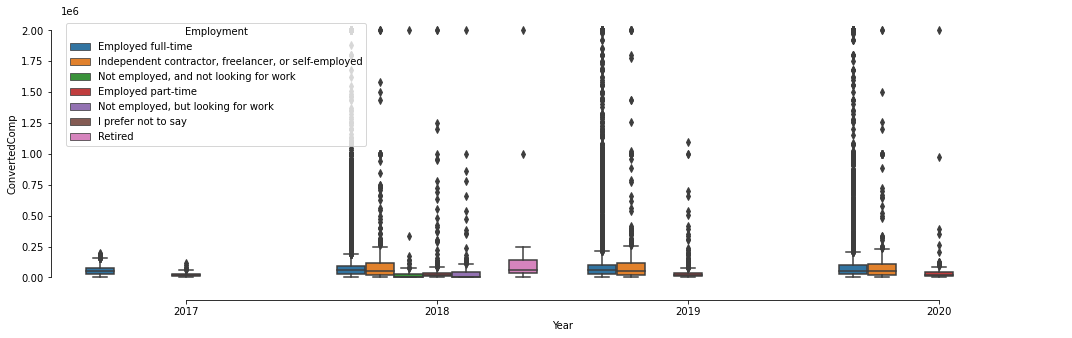

In [19]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x="Year", y="ConvertedComp",
            hue = 'Employment',
            data=df,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

To make this analysis as practical as possible, we will only consider people who was having a job related to data, so we will exclude people who does not have a salary information and job of not employed, no information on job or retired.

In [20]:
# Drop irrelevant job title
df = df.loc[~df['Employment'].isin(['Not employed, and not looking for work',
                                    'Not employed, but looking for work',
                                    'I prefer not to say', 'Retired']), :]
# Drop people do not have information about salary
df = df.loc[~df["ConvertedComp"].isna(),:]

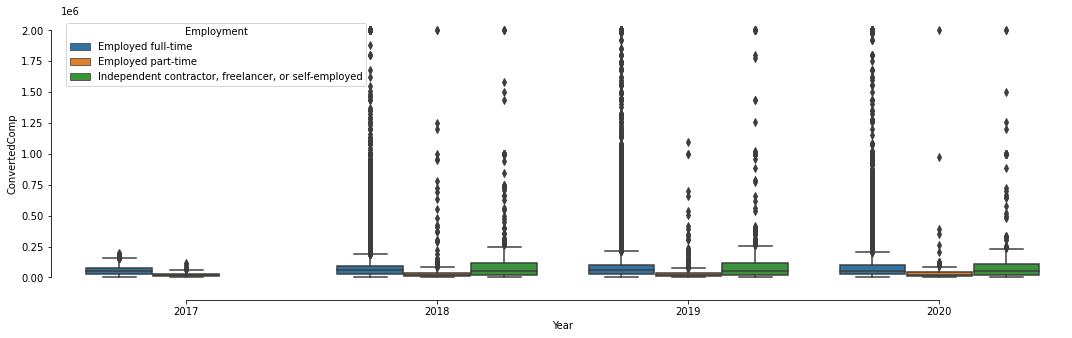

In [21]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x="Year", y="ConvertedComp",
            hue = 'Employment',
            data=df,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

From the box-plot, we can observe that there is a lot of outliers in the annual salary, for relevancy of this analysis, we will exclude people ving annual salary more than 300,000$

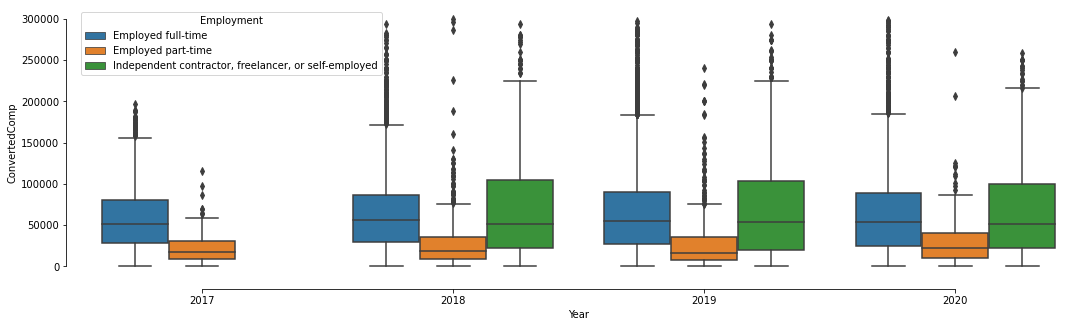

In [22]:
# Remove outlier
df = df.loc[(df['ConvertedComp'] < 300000) & (df['ConvertedComp'] > 0),:]
# plot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x="Year", y="ConvertedComp",
            hue = 'Employment',
            data=df,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

In [23]:
#percentage of data kept after removing outliers and considering only instances that have our target variable
len(df)/len(data)*100

54.58074786394205

## Missing values treatment

In [24]:
#This is the number of missing values still existing (without dummies)
df.isna().sum().sum()

5489

In [25]:
#will give the index of the rows with any missing value
nans_index = df.isna().any(axis=1)
df[nans_index]

Year Hobbyist  ConvertedComp        Country  EdLevel  \
252617  2017      Yes    40000.00000        Germany     12.0   
252719  2017      Yes    20493.82716         Poland     12.0   
253076  2017      Yes    27272.72727         Canada     12.0   
253346  2017      Yes    88000.00000  United States     12.0   
253395  2017      Yes   110000.00000  United States     16.0   
...      ...      ...            ...            ...      ...   
63051   2020      Yes     5868.00000          India      NaN   
63383   2020       No    13620.00000      Argentina     12.0   
63542   2020      Yes     2640.00000      Sri Lanka      NaN   
63941   2020      Yes    38375.00000          Spain      0.0   
63998   2020      Yes   100000.00000  United States     16.0   

                Employment JobSat  OrgSize    UndergradMajor  YearsCodePro  
252617  Employed full-time    6.0     99.0               NaN           4.0  
252719  Employed part-time    9.0      9.0               NaN           1.0  
253076  Employed full-time    3.0     99.0               NaN           2.0  
253346  Employed full-time    5.0    499.0               NaN          11.0  
253395  Employed full-time    9.0      9.0  Computer science           NaN  
...                    ...    ...      ...               ...           ...  
63051   Employed full-time      8  10000.0  Computer science           6.0  
63383   Employed full-time      5     99.0               NaN           7.0  
63542   Employed full-time      2     19.0  Computer science           1.0  
63941   Employed full-time      6   4999.0               NaN           7.0  
63998   Employed full-time      6  10000.0               NaN           5.0  

[4935 rows x 10 columns]

In [26]:
#if we would remove all the rowa with still missing values that would mean loosing 14,5% of data
len(df[nans_index])/len(df)*100

14.687062885033184

In [27]:
#Let's verify the type of the variables with numeric values
df['YearsCodePro'].dtype

dtype('float64')

In [28]:
df['JobSat'].dtype

dtype('O')

In [29]:
#let's transform to float
df['JobSat']=df['JobSat'].astype(float)

In [30]:
df['JobSat'].dtype

dtype('float64')

In [31]:
# Creating new df copy to explore missing values imputation
df_na = df.copy()


In [32]:
# KNNImputer 
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# to fill the missing values 
related_variables_yearscodepro = (['YearsCodePro'])
related_variables_jobsat = (['JobSat'])

In [33]:
df_na[related_variables_yearscodepro] = imputer.fit_transform(df_na[related_variables_yearscodepro])
df_na[related_variables_jobsat] = imputer.fit_transform(df_na[related_variables_jobsat])

In [34]:
df_na["YearsCodePro"].unique()

array([ 2.        ,  3.        ,  4.        , 15.        ,  5.        ,
       10.        ,  9.        ,  1.        , 16.        ,  7.        ,
       20.        , 18.        , 17.        , 11.        ,  6.        ,
       14.        ,  8.        , 19.        ,  8.75571335, 13.        ,
       12.        , 23.        , 26.        , 30.        , 29.        ,
       22.        , 25.        , 21.        , 24.        , 27.        ,
       28.        ])

In [35]:
df_na["YearsCodePro"]=df_na["YearsCodePro"].round(decimals=0)

In [36]:
df_na["YearsCodePro"].unique()

array([ 2.,  3.,  4., 15.,  5., 10.,  9.,  1., 16.,  7., 20., 18., 17.,
       11.,  6., 14.,  8., 19., 13., 12., 23., 26., 30., 29., 22., 25.,
       21., 24., 27., 28.])

In [37]:
df_na["JobSat"].unique()

array([ 4.        , 10.        ,  6.        ,  5.        ,  7.        ,
        8.        ,  1.        ,  3.        ,  9.        ,  2.        ,
        6.12426177,  0.        ])

In [38]:
df_na["JobSat"]=df_na["JobSat"].round(decimals=0)

In [39]:
df_na["JobSat"].unique()

array([ 4., 10.,  6.,  5.,  7.,  8.,  1.,  3.,  9.,  2.,  0.])

In [40]:
#apply the imputation to the database
df=df_na.copy()

In [41]:
#filling with mode
df['EdLevel'].fillna(df['EdLevel'].mode()[0], inplace=True)

In [42]:
df['Employment'].value_counts().head(10) 

Employed full-time                                      28673
Independent contractor, freelancer, or self-employed     3387
Employed part-time                                       1501
Name: Employment, dtype: int64

In [43]:
#since there is clearly a most frequent value we will use the mode to subtitute the missing values
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)

In [44]:
df['Employment'].isna().sum()

0

In [45]:
df['OrgSize'].value_counts().head(10) 

99.0       6861
499.0      5332
10000.0    4360
9.0        4087
19.0       3538
4999.0     3331
999.0      1889
9999.0     1408
1.0        1063
Name: OrgSize, dtype: int64

In [46]:
#since there is an option for 'i don't know' we will use it to fill the missing values
df['OrgSize'].fillna(df['OrgSize'].mode()[0], inplace=True)

In [47]:
df['UndergradMajor'].value_counts().head(10) 

Computer science                  17015
Another engineering discipline     2746
Information systems                2397
Natural science                    2071
Mathematics or statistics          1962
Business                           1012
Social science                      806
Web development or web design       705
Humanities                          624
Fine arts or performing arts        338
Name: UndergradMajor, dtype: int64

In [48]:
#there is clearly a most frequent value in this variable so we will use the mode to substitute the missing values
df['UndergradMajor'].fillna(df['UndergradMajor'].mode()[0], inplace=True)

In [49]:
# to verify the final number of missing values 
df.isna().sum()

Year              0
Hobbyist          0
ConvertedComp     0
Country           0
EdLevel           0
Employment        0
JobSat            0
OrgSize           0
UndergradMajor    0
YearsCodePro      0
dtype: int64

In [50]:
#the nan values in the dummies will be substituted by zero, we just must have in consideration that for example the databases in 2017 don't include all the options that exist in the other years
#in the same way in devtype the options of data/ business analyst and data engineer in 2017 qre not existing
dm_db_nextyear.fillna(value=0, inplace=True)
dm_dev_type.fillna(value=0, inplace=True)
dm_db_work.fillna(value=0, inplace=True)
dm_language_nextyear.fillna(value=0, inplace=True)
dm_language_work.fillna(value=0, inplace=True)

In [51]:
df_all = pd.concat([df, dm_dev_type, dm_db_work, dm_language_work],
                   axis=1, join='inner')


In [52]:
#final number of missing values
df_all.isna().sum().sum()

0

In [53]:
# First, we will divided the salary by 1000 for easy interpretation
df['ConvertedComp'] = df['ConvertedComp']/1000

## 1. What is the impact of education major on salary

In [54]:
# Use normal dataframe
df.head()

Year Hobbyist  ConvertedComp         Country  EdLevel  \
252342  2017      Yes      43.750000  United Kingdom     16.0   
252345  2017      Yes      51.282051         Denmark     14.0   
252361  2017       No      25.000000          Israel     14.0   
252368  2017      Yes     100.000000   United States     14.0   
252372  2017      Yes      27.000000         Ukraine     18.0   

                Employment  JobSat  OrgSize    UndergradMajor  YearsCodePro  
252342  Employed full-time     4.0      9.0  Computer science           2.0  
252345  Employed part-time    10.0    499.0  Computer science           3.0  
252361  Employed full-time     6.0   9999.0  Computer science           4.0  
252368  Employed full-time     5.0     99.0  Computer science          15.0  
252372  Employed full-time     7.0    499.0  Computer science           5.0

<Figure size 21600x21600 with 0 Axes>

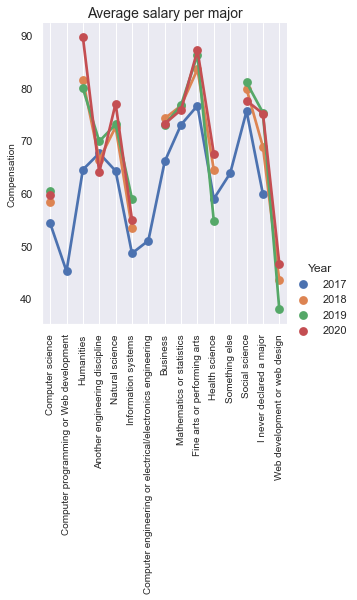

In [55]:
from numpy import median
plt.figure(figsize=(300, 300))
sns.set(font_scale = 1)
plt.tight_layout()
sns.catplot(x="UndergradMajor", y="ConvertedComp", hue="Year", kind="point", data=df, ci=0)
plt.xlabel('') 
plt.ylabel("Compensation", size=10)
plt.xticks(fontsize=10, rotation=90)
plt.title("Average salary per major", size=14)          
plt.grid()

<Figure size 21600x21600 with 0 Axes>

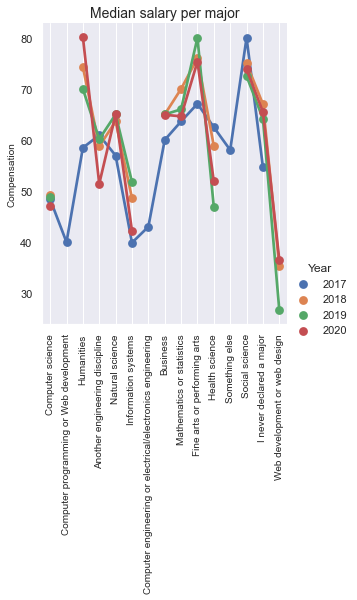

In [56]:
from numpy import median
plt.figure(figsize=(300, 300))
sns.set(font_scale = 1)
plt.tight_layout()
sns.catplot(x="UndergradMajor", y="ConvertedComp", hue="Year", kind="point", data=df, estimator=median, ci=0)
plt.xlabel('') 
plt.ylabel("Compensation", size=10)
plt.xticks(fontsize=10, rotation=90)
plt.title("Median salary per major", size=14) 
plt.grid()

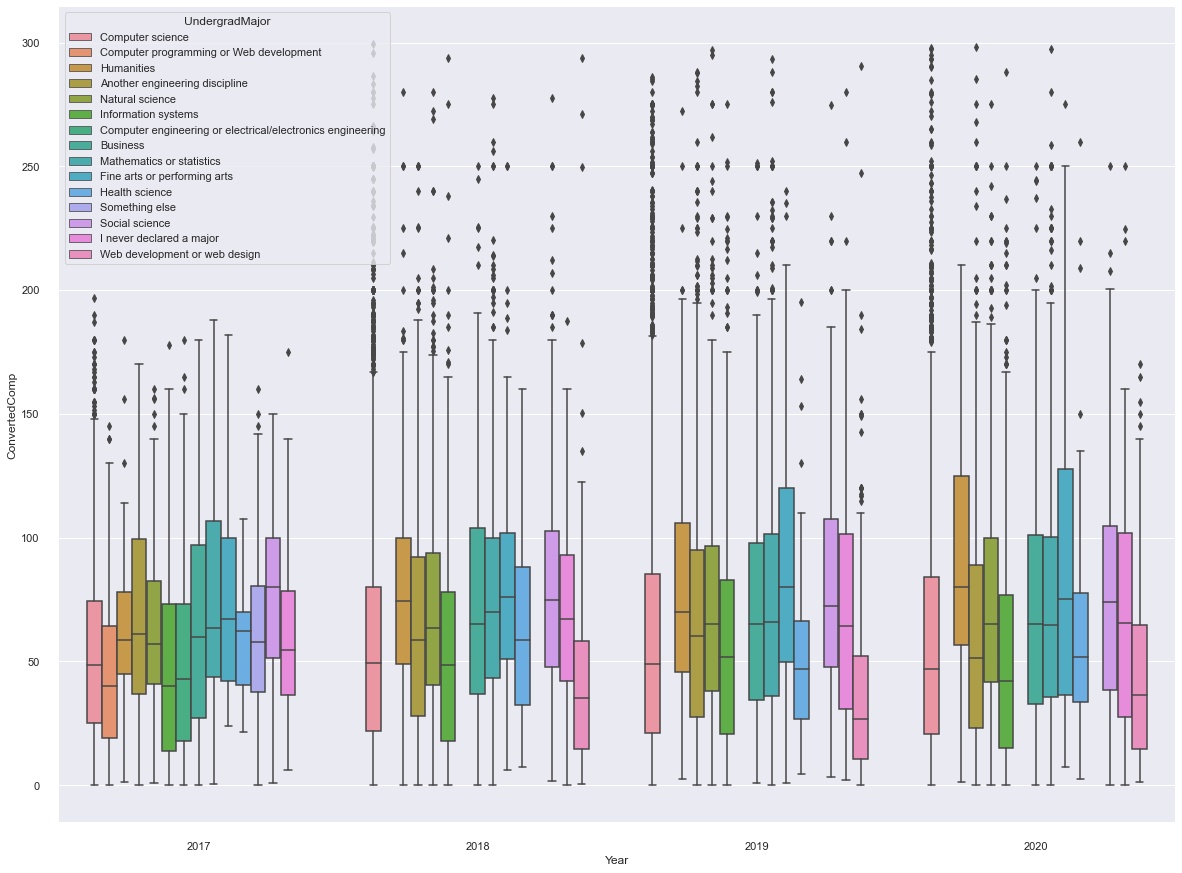

In [57]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(x="Year", y="ConvertedComp",
            hue = 'UndergradMajor',
            data=df,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

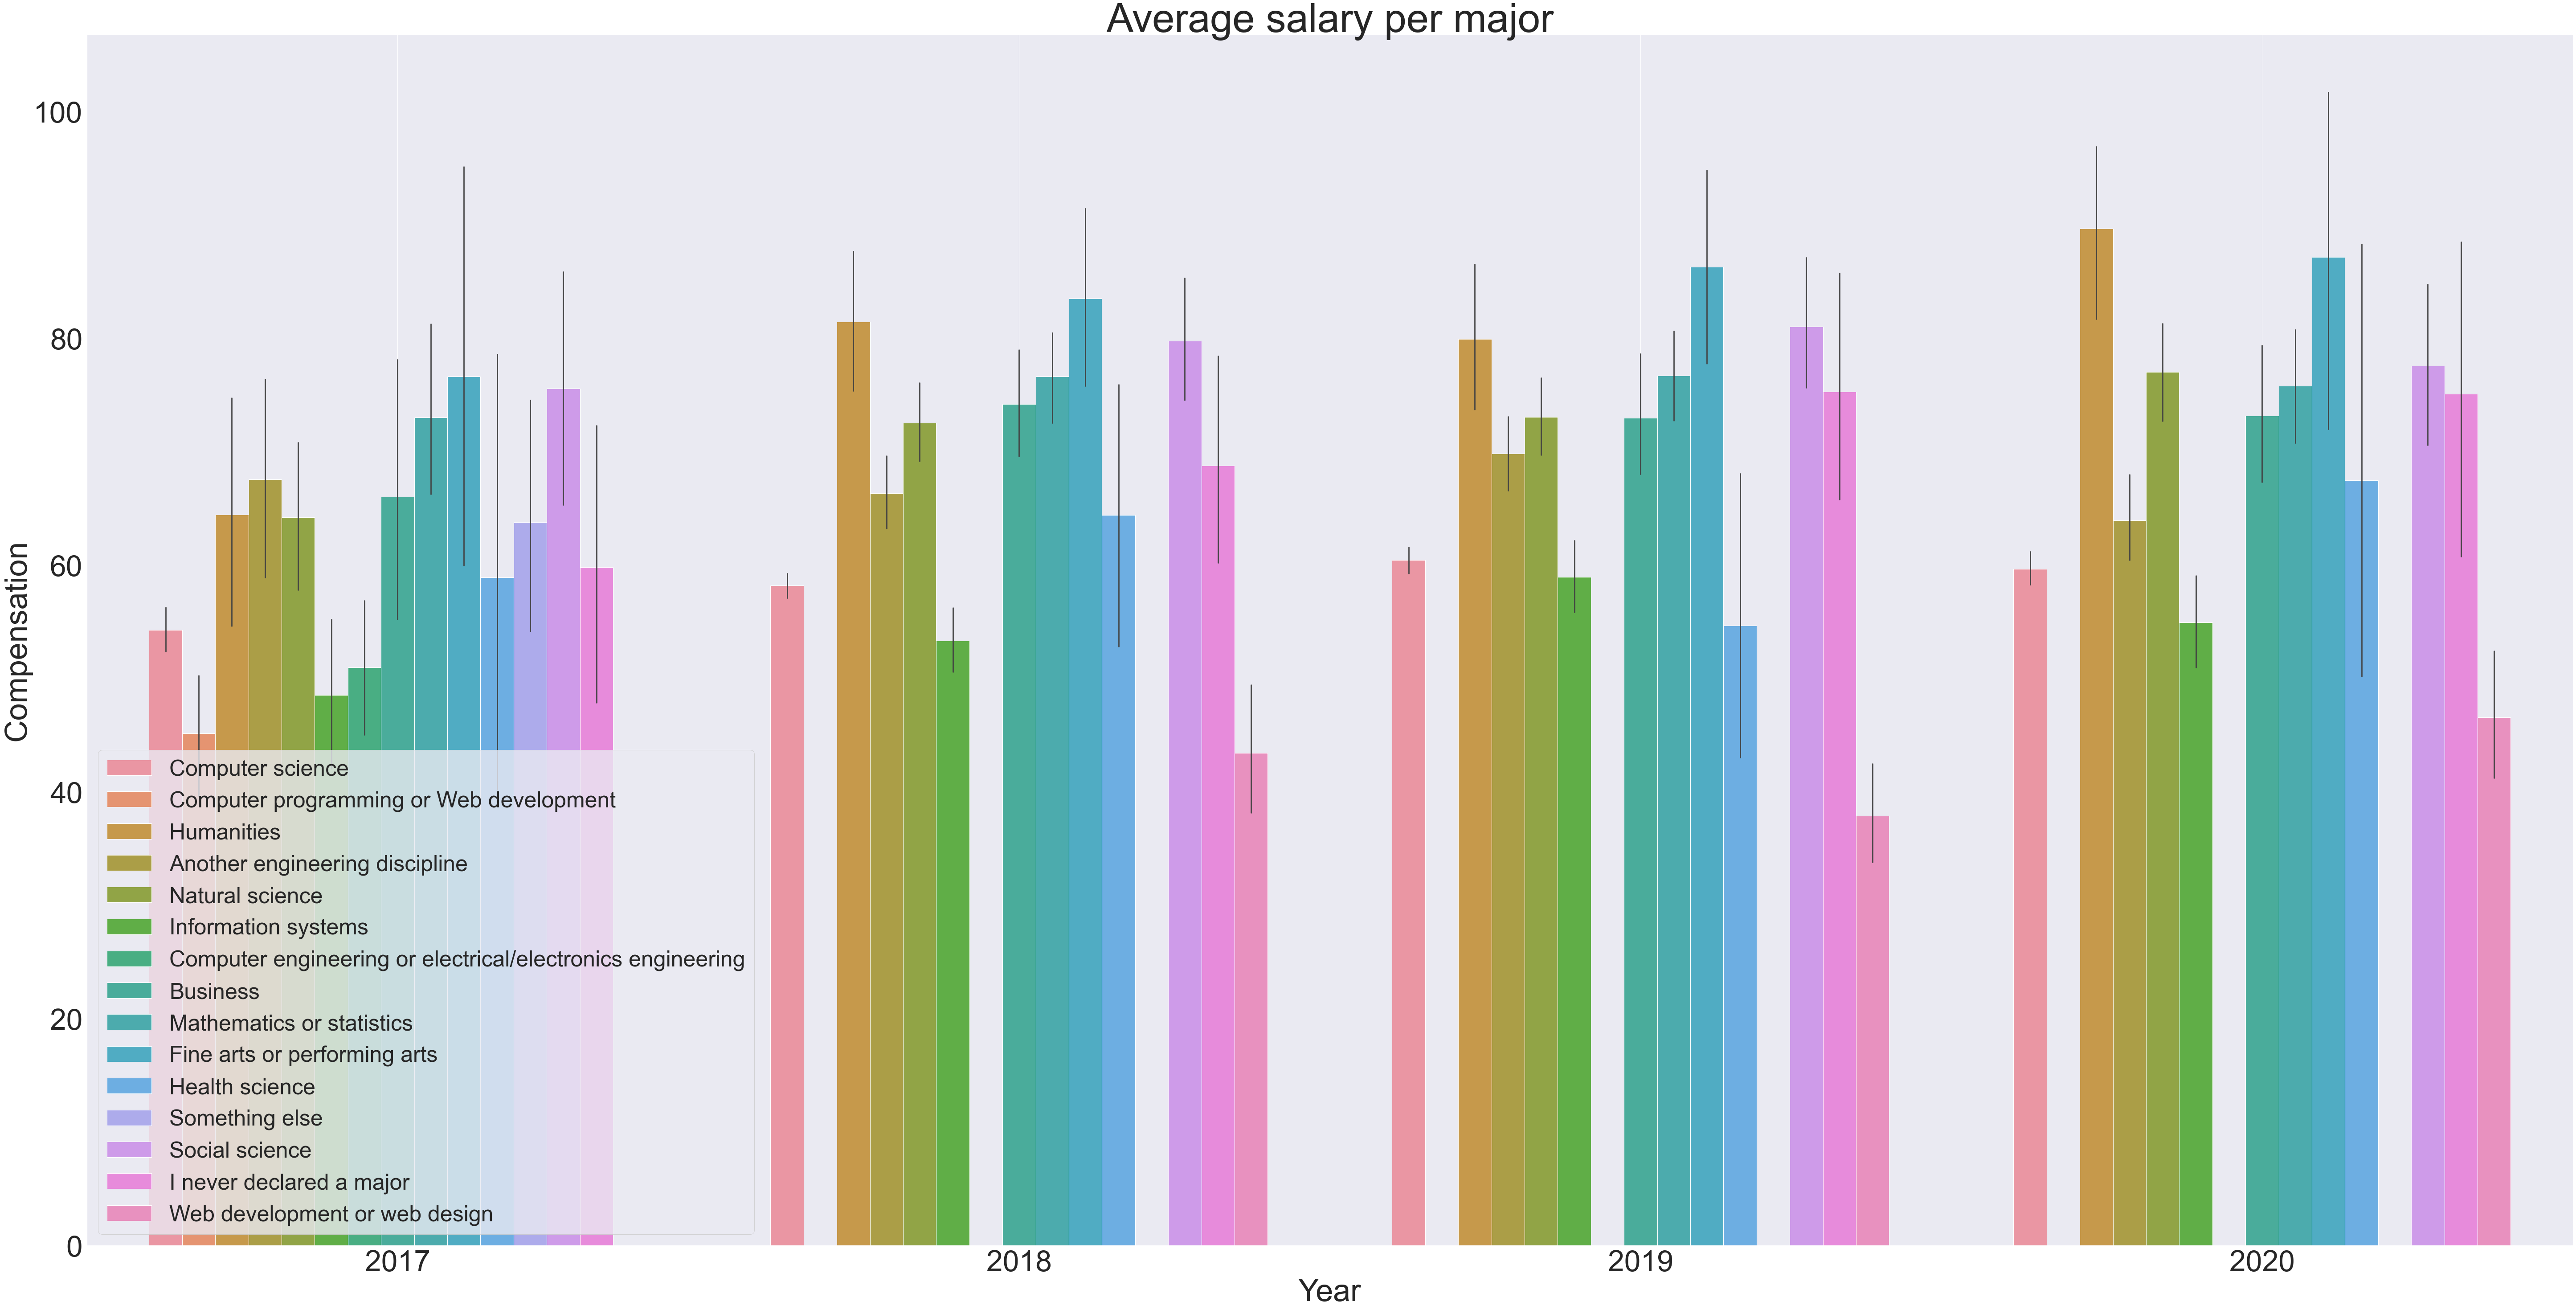

In [58]:
plt.figure(figsize=(100, 50))
sns.set(font_scale = 6)
sns.despine(left=True)
sns.barplot(x="Year", 
            y="ConvertedComp", 
            hue="UndergradMajor", 
            data=df)
plt.ylabel("Compensation", size=70)
plt.legend(loc=3, prop={'size': 50})
plt.xlabel("Year", size=70)
plt.title("Average salary per major", size=90)
plt.grid()
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")

In [59]:
metric_features=['ConvertedComp','JobSat','YearsCodePro',"OrgSize", "EdLevel"]

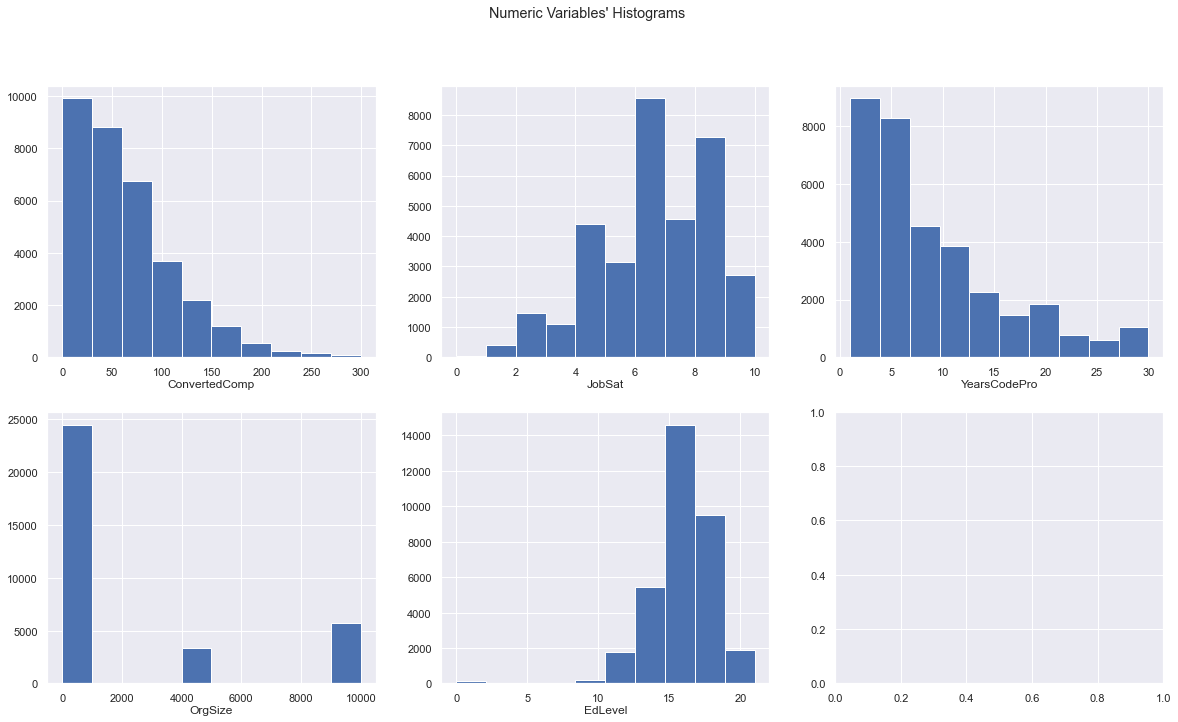

In [60]:
from math import ceil
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

Text(0.5, 1.0, 'Grouped Boxenplot: Impact of major in Salary')

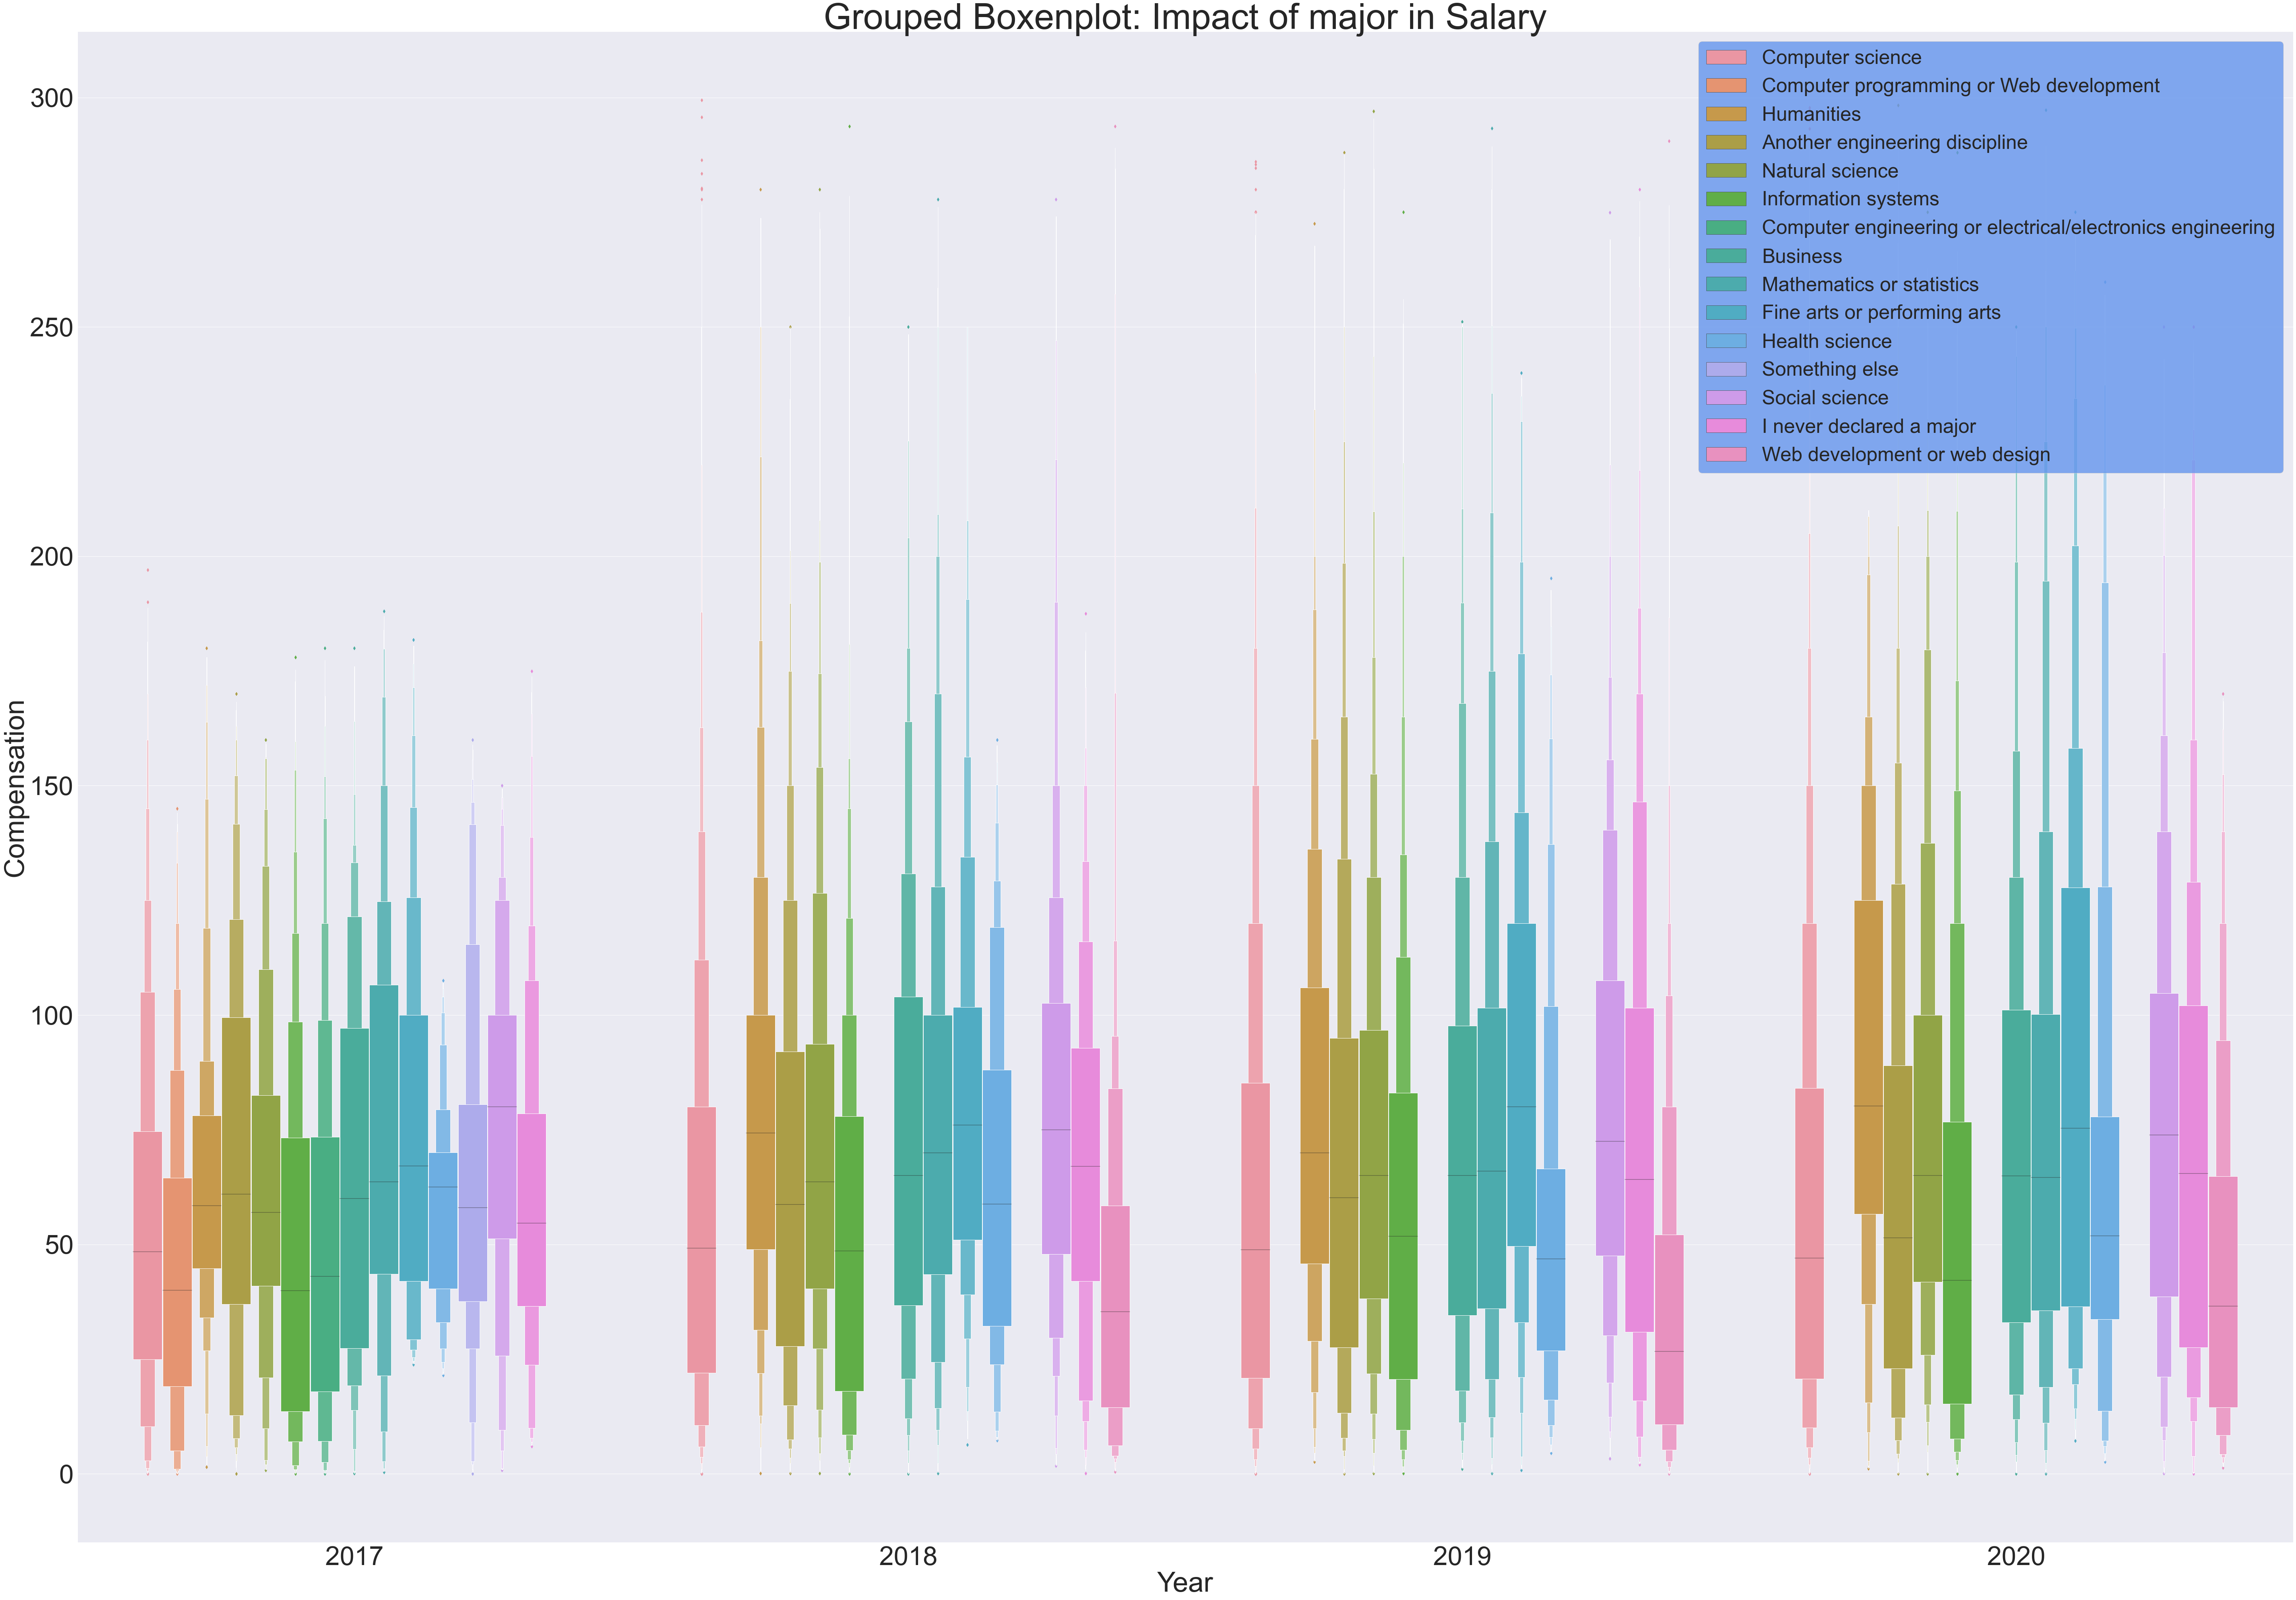

In [61]:
plt.figure(figsize=(100, 70))
sns.set(font_scale = 6)
sns.boxenplot(x="Year", 
            y="ConvertedComp", 
            hue="UndergradMajor", 
            data=df)
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
plt.ylabel("Compensation", size=70)
plt.legend(loc=1, prop={'size': 50})
plt.xlabel("Year", size=70)
plt.title("Grouped Boxenplot: Impact of major in Salary", size=90)
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")

In [62]:
plt.figure(figsize=(200, 300))
sns.set(font_scale = 20)
ax = sns.countplot(y="UndergradMajor", hue="Year", data=df, order = df["UndergradMajor"].value_counts().index)
ax.set_ylabel('')    
plt.legend(loc=4, prop={'size': 200})
plt.title("Undergraduate major presence", size=190)
plt.grid()

## 2. What is the impact of Job type on salary

In [ ]:
df_job = pd.concat([df, dm_dev_type],
                   axis=1, join='inner')
df_job.head()

## 3. What is the impact of Year of experience on Salary

In [ ]:
# Use normal dataframe
df.head()

## 4. What is the impact of Programming language on Salary

In [ ]:
# concat programming language features together
df_p_language = pd.concat([df, dm_db_nextyear, dm_db_work,  dm_language_nextyear, dm_language_work],
                   axis=1, join='inner')
df_p_language.head()

## Correlation study

In [69]:
#check the variables that are highly correlated (more than or equal to 90%) and drop one of them to avoid redundancy
corr_matrix = df_all.corr().abs()
high_corr_var=np.where(corr_matrix>=0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('CSS', 'HTML')]

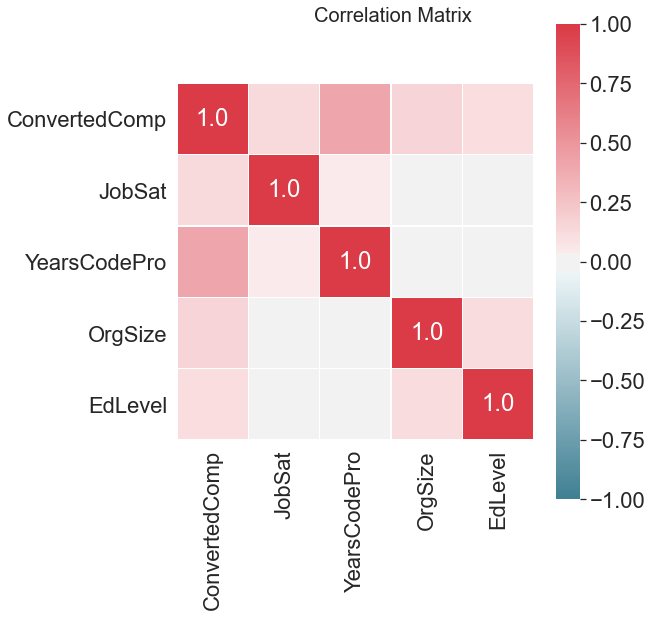

In [70]:
# Prepare figure
fig = plt.figure(figsize=(8, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.set(font_scale = 2)
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()



In [71]:
corr_target = df.corrwith(df["ConvertedComp"])
corr_target

Year             0.030056
ConvertedComp    1.000000
EdLevel          0.111980
JobSat           0.130389
OrgSize          0.156566
YearsCodePro     0.406255
dtype: float64

## One hot encoding

In [72]:
non_metric_features=['Hobbyist','Country','Employment','UndergradMajor']

In [73]:
ohc = OneHotEncoder(sparse=False, drop="if_binary")
ohc_feat = ohc.fit_transform(df_all[non_metric_features])
ohc_feat_names = ohc.get_feature_names(non_metric_features)
encoded = pd.DataFrame(ohc_feat, index = df_all.index, columns = ohc_feat_names)  

In [74]:
df_all=df_all.drop(non_metric_features, axis=1)

In [75]:
df_encoded=df.drop(non_metric_features, axis=1)

In [76]:
df_all=pd.concat([df_all, encoded], axis=1,copy=False)

In [77]:
df_encoded=pd.concat([df_encoded, encoded], axis=1,copy=False)

In [78]:
df_all.astype(float)

Year  ConvertedComp  EdLevel  JobSat  OrgSize  YearsCodePro  \
252342  2017.0    43750.00000     16.0     4.0      9.0           2.0   
252345  2017.0    51282.05128     14.0    10.0    499.0           3.0   
252361  2017.0    25000.00000     14.0     6.0   9999.0           4.0   
252368  2017.0   100000.00000     14.0     5.0     99.0          15.0   
252372  2017.0    27000.00000     18.0     7.0    499.0           5.0   
...        ...            ...      ...     ...      ...           ...   
64113   2020.0   225000.00000     14.0     8.0   4999.0          15.0   
64121   2020.0      369.00000     14.0     2.0   4999.0          27.0   
64125   2020.0    38484.00000     18.0     8.0      1.0          12.0   
64127   2020.0   140000.00000     21.0     8.0  10000.0          12.0   
64141   2020.0   129718.00000     18.0     8.0      1.0           9.0   

        Data scientist or machine learning specialist  Database administrator  \
252342                                            1.0                     1.0   
252345                                            1.0                     0.0   
252361                                            1.0                     0.0   
252368                                            0.0                     1.0   
252372                                            0.0                     1.0   
...                                               ...                     ...   
64113                                             0.0                     0.0   
64121                                             0.0                     1.0   
64125                                             0.0                     0.0   
64127                                             1.0                     0.0   
64141                                             0.0                     1.0   

        Data or business analyst  Engineer, data  ...  \
252342                       0.0             0.0  ...   
252345                       0.0             0.0  ...   
252361                       0.0             0.0  ...   
252368                       0.0             0.0  ...   
252372                       0.0             0.0  ...   
...                          ...             ...  ...   
64113                        0.0             1.0  ...   
64121                        0.0             1.0  ...   
64125                        1.0             0.0  ...   
64127                        1.0             1.0  ...   
64141                        0.0             0.0  ...   

        UndergradMajor_Fine arts or performing arts  \
252342                                          0.0   
252345                                          0.0   
252361                                          0.0   
252368                                          0.0   
252372                                          0.0   
...                                             ...   
64113                                           0.0   
64121                                           0.0   
64125                                           0.0   
64127                                           0.0   
64141                                           0.0   

        UndergradMajor_Health science  UndergradMajor_Humanities  \
252342                            0.0                        0.0   
252345                            0.0                        0.0   
252361                            0.0                        0.0   
252368                            0.0                        0.0   
252372                            0.0                        0.0   
...                               ...                        ...   
64113                             0.0                        0.0   
64121                             0.0                        0.0   
64125                             0.0                        1.0   
64127                             0.0                        0.0   
64141                             0.0                        0.0  

In [79]:
df_all.dtypes

Year                                              int64
ConvertedComp                                   float64
EdLevel                                         float64
JobSat                                          float64
OrgSize                                         float64
                                                 ...   
UndergradMajor_Mathematics or statistics        float64
UndergradMajor_Natural science                  float64
UndergradMajor_Social science                   float64
UndergradMajor_Something else                   float64
UndergradMajor_Web development or web design    float64
Length: 282, dtype: object

In [80]:
df_encoded_devtype=pd.concat([df_encoded,dm_dev_type ], axis=1,copy=False)

In [ ]:
df_encoded_db_ny=pd.concat([df_encoded,dm_db_nextyear ], axis=1,copy=False)

In [ ]:
df_encoded_db_w=pd.concat([df_encoded,dm_db_work], axis=1,copy=False)

In [ ]:
df_encoded_l_ny=pd.concat([df_encoded,dm_language_nextyear], axis=1,copy=False)

In [ ]:
df_encoded_l_w=pd.concat([df_encoded,dm_language_work ], axis=1,copy=False)

In [82]:
dm_major=df_all.filter(regex="^UndergradMajor")
dm_major

UndergradMajor_Another engineering discipline  \
252342                                            0.0   
252345                                            0.0   
252361                                            0.0   
252368                                            0.0   
252372                                            0.0   
...                                               ...   
64113                                             0.0   
64121                                             0.0   
64125                                             0.0   
64127                                             1.0   
64141                                             1.0   

        UndergradMajor_Business  \
252342                      0.0   
252345                      0.0   
252361                      0.0   
252368                      0.0   
252372                      0.0   
...                         ...   
64113                       0.0   
64121                       0.0   
64125                       0.0   
64127                       0.0   
64141                       0.0   

        UndergradMajor_Computer engineering or electrical/electronics engineering  \
252342                                                0.0                           
252345                                                0.0                           
252361                                                0.0                           
252368                                                0.0                           
252372                                                0.0                           
...                                                   ...                           
64113                                                 0.0                           
64121                                                 0.0                           
64125                                                 0.0                           
64127                                                 0.0                           
64141                                                 0.0                           

        UndergradMajor_Computer programming or Web development  \
252342                                                0.0        
252345                                                0.0        
252361                                                0.0        
252368                                                0.0        
252372                                                0.0        
...                                                   ...        
64113                                                 0.0        
64121                                                 0.0        
64125                                                 0.0        
64127                                                 0.0        
64141                                                 0.0        

        UndergradMajor_Computer science  \
252342                              1.0   
252345                              1.0   
252361                              1.0   
252368                              1.0   
252372                              1.0   
...                                 ...   
64113                               0.0   
64121                               1.0   
64125                               0.0   
64127                               0.0   
64141                               0.0   

        UndergradMajor_Fine arts or performing arts  \
252342                                          0.0   
252345                                          0.0   
252361                                          0.0   
252368                                          0.0   
252372                                          0.0   
...                                             ...   
64113                                           0.0   
64121                                           0.0   
64125                                           0.0   
64127                

C:\Users\marta\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


<Figure size 1152x288 with 0 Axes>

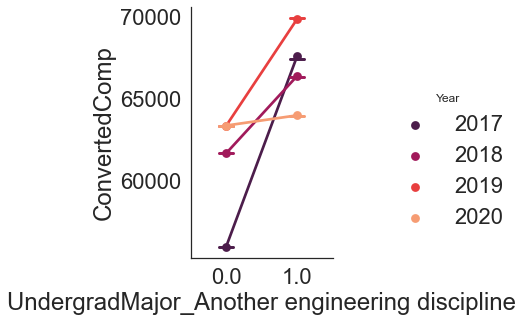

In [89]:
plt.figure(figsize=(16,4))
sns.set_style("white")
#names = ["UndergradMajor_Another engineering discipline", "UndergradMajor_Business", "UndergradMajor_Computer science", "UndergradMajor_Mathematics or statistics"]
#major_types = ['Engineering', 'Business', 'Computer science', 'Maths&Stats']

ax.set_title("Engineering", fontsize=14)    
sns.catplot(x="UndergradMajor_Another engineering discipline", y="ConvertedComp", hue="Year", kind="point",capsize=.2, palette="rocket", data=df_all, ax= ax, ci=0)

#ax.set_ylim(bottom=50, top=75)

C:\Users\marta\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


<Figure size 1152x288 with 0 Axes>

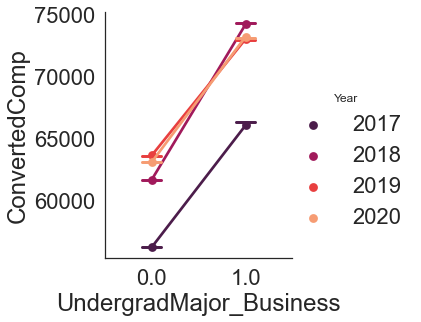

In [90]:
plt.figure(figsize=(16,4))
sns.set_style("white")
#names = ["UndergradMajor_Another engineering discipline", "UndergradMajor_Business", "UndergradMajor_Computer science", "UndergradMajor_Mathematics or statistics"]
#major_types = ['Engineering', 'Business', 'Computer science', 'Maths&Stats']

ax.set_title("Business", fontsize=14)    
sns.catplot(x="UndergradMajor_Business", y="ConvertedComp", hue="Year", kind="point",capsize=.2, palette="rocket", data=df_all, ax= ax, ci=0)

#ax.set_ylim(bottom=50, top=75)

C:\Users\marta\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


<Figure size 1152x288 with 0 Axes>

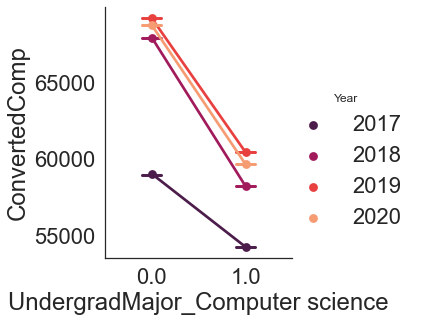

In [91]:
plt.figure(figsize=(16,4))
sns.set_style("white")
#names = ["UndergradMajor_Another engineering discipline", "UndergradMajor_Business", "UndergradMajor_Computer science", "UndergradMajor_Mathematics or statistics"]
#major_types = ['Engineering', 'Business', 'Computer science', 'Maths&Stats']

ax.set_title("Computer Science", fontsize=14)    
sns.catplot(x="UndergradMajor_Computer science", y="ConvertedComp", hue="Year", kind="point",capsize=.2, palette="rocket", data=df_all, ax= ax, ci=0)

#ax.set_ylim(bottom=50, top=75)

C:\Users\marta\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


<Figure size 1152x288 with 0 Axes>

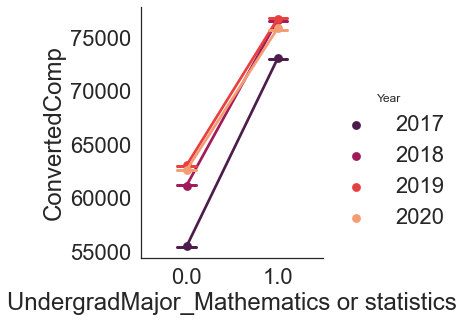

In [92]:
plt.figure(figsize=(16,4))
sns.set_style("white")
#names = ["UndergradMajor_Another engineering discipline", "UndergradMajor_Business", "UndergradMajor_Computer science", "UndergradMajor_Mathematics or statistics"]
#major_types = ['Engineering', 'Business', 'Computer science', 'Maths&Stats']

ax.set_title("Computer Science", fontsize=14)    
sns.catplot(x="UndergradMajor_Mathematics or statistics", y="ConvertedComp", hue="Year", kind="point",capsize=.2, palette="rocket", data=df_all, ax= ax, ci=0)

#ax.set_ylim(bottom=50, top=75)

In [ ]:
"UndergradMajor_Another.engineering.discipline"
"UndergradMajor_Business"
"UndergradMajor_Computer.science"
"UndergradMajor_Mathematics.or.statistics"

In [ ]:
#df_encoded_major=pd.concat([df_encoded,dm_major], axis=1,copy=False)

## Obtain the csv file

In [ ]:
# export the data
filename = 'stack.csv'
df_all.to_csv(filename, index=False)
# df
df_all.head()

In [ ]:
# export the data
filename = 'stack_devtype.csv'
df_encoded_devtype.to_csv(filename, index=False)
# df
df_encoded_devtype.head()

In [ ]:
# export the data
filename = 'stack_db_ny.csv'
df_encoded_db_ny.to_csv(filename, index=False)
# df
df_encoded_db_ny.head()

In [ ]:
# export the data
filename = 'stack_db_w.csv'
df_encoded_db_w.to_csv(filename, index=False)
# df
df_encoded_db_w.head()

In [ ]:
# export the data
filename = 'stack_l_ny.csv'
df_encoded_l_ny.to_csv(filename, index=False)
# df
df_encoded_l_ny.head()

In [ ]:
# export the data
filename = 'stack_l_w.csv'
df_encoded_l_w.to_csv(filename, index=False)
# df
df_encoded_l_w.head()

In [ ]:
# export the data
filename = 'stack_major.csv'
df_encoded.to_csv(filename, index=False)
# df
df_encoded.head()

## Feature importance

In [93]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [94]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X = df_all.drop(columns=['ConvertedComp'])
y = df_all["ConvertedComp"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeRegressor(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the salary correctly".format(dt.score(X_test, y_test)*100))






It is estimated that in average, we are able to predict 42.91% of the salary correctly


In [95]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Country_United States                            0.612730
YearsCodePro                                     0.268318
EdLevel                                          0.026575
Country_Switzerland                              0.021408
Data scientist or machine learning specialist    0.015029
                                                   ...   
Country_Madagascar                               0.000000
Country_Macedonia                                0.000000
Country_Luxembourg                               0.000000
Country_Lithuania                                0.000000
Country_Greece                                   0.000000
Length: 281, dtype: float64

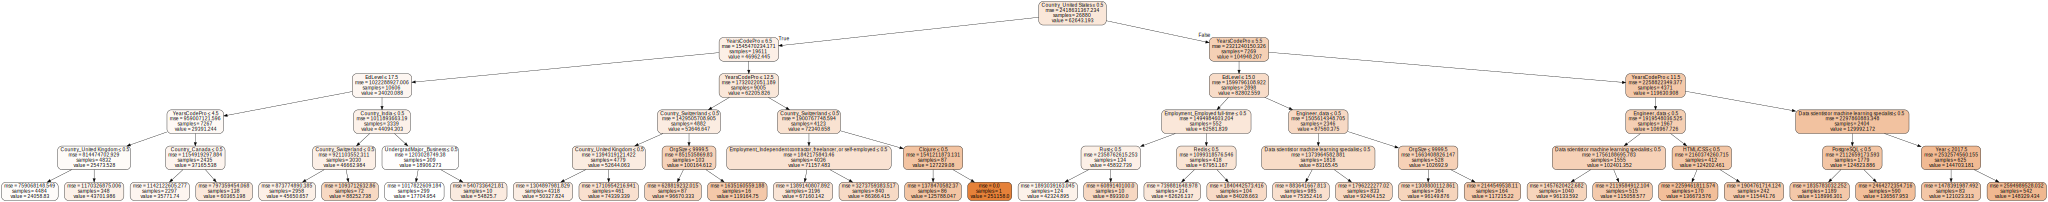

In [96]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)

In [97]:
dm_dev_type.columns


Index(['Data scientist or machine learning specialist',
       'Database administrator', 'Data or business analyst', 'Engineer, data'],
      dtype='object')

In [98]:
dm_db_nextyear.columns


Index(['Cassandra', 'MongoDB', 'MySQL', 'Oracle', 'PostgreSQL', 'Redis',
       'SQL Server', 'SQLite', 'Amazon DynamoDB', 'Amazon RDS/Aurora',
       'Amazon Redshift', 'Apache HBase', 'Apache Hive', 'Couchbase',
       'DynamoDB', 'Elasticsearch', 'Firebase', 'Google BigQuery',
       'Google Cloud Storage', 'IBM DB2', 'IBM Db2', 'MariaDB', 'Memcached',
       'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Microsoft SQL Server',
       'Neo4j', 'Other(s):'],
      dtype='object')

In [99]:
dm_db_work.columns


Index(['Cassandra', 'MongoDB', 'MySQL', 'Oracle', 'PostgreSQL', 'Redis',
       'SQL Server', 'SQLite', 'Amazon DynamoDB', 'Amazon RDS/Aurora',
       'Amazon Redshift', 'Apache HBase', 'Apache Hive', 'Couchbase',
       'DynamoDB', 'Elasticsearch', 'Firebase', 'Google BigQuery',
       'Google Cloud Storage', 'IBM DB2', 'IBM Db2', 'MariaDB', 'Memcached',
       'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Microsoft SQL Server',
       'Neo4j', 'Other(s):'],
      dtype='object')

In [100]:
dm_language_nextyear.columns


Index(['Assembly', 'C', 'C#', 'C++', 'Clojure', 'CoffeeScript', 'Common Lisp',
       'Dart', 'Elixir', 'Erlang', 'F#', 'Go', 'Groovy', 'Hack', 'Haskell',
       'Java', 'JavaScript', 'Julia', 'Lua', 'Matlab', 'Objective-C', 'PHP',
       'Perl', 'Python', 'R', 'Ruby', 'Rust', 'SQL', 'Scala', 'Smalltalk',
       'Swift', 'TypeScript', 'VB.NET', 'VBA', 'Visual Basic 6', 'Bash/Shell',
       'Bash/Shell/PowerShell', 'CSS', 'Cobol', 'Delphi/Object Pascal', 'HTML',
       'HTML/CSS', 'Kotlin', 'Ocaml', 'Other(s):', 'WebAssembly'],
      dtype='object')

In [101]:
dm_language_work.columns


Index(['Assembly', 'C', 'C#', 'C++', 'Clojure', 'CoffeeScript', 'Common Lisp',
       'Dart', 'Elixir', 'Erlang', 'F#', 'Go', 'Groovy', 'Hack', 'Haskell',
       'Java', 'JavaScript', 'Julia', 'Lua', 'Matlab', 'Objective-C', 'PHP',
       'Perl', 'Python', 'R', 'Ruby', 'Rust', 'SQL', 'Scala', 'Smalltalk',
       'Swift', 'TypeScript', 'VB.NET', 'VBA', 'Visual Basic 6', 'Bash/Shell',
       'Bash/Shell/PowerShell', 'CSS', 'Cobol', 'Delphi/Object Pascal', 'HTML',
       'HTML/CSS', 'Kotlin', 'Ocaml', 'Other(s):', 'WebAssembly'],
      dtype='object')

## Normalization

In [102]:
df_all_withoutscaler=df_all.copy()

In [103]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
df_all_normalized=df_all.copy()
trans = RobustScaler()
#we don't year right?
metric_features=['ConvertedComp', 'JobSat', 'YearsCodePro']
df_all_normalized[metric_features] = trans.fit_transform(df_all_normalized[metric_features])


In [104]:
df_all_normalized

Year  ConvertedComp  EdLevel    JobSat  OrgSize  YearsCodePro  \
252342  2017      -0.148095     16.0 -0.666667      9.0     -0.444444   
252345  2017      -0.027505     14.0  1.333333    499.0     -0.333333   
252361  2017      -0.448287     14.0  0.000000   9999.0     -0.222222   
252368  2017       0.752482     14.0 -0.333333     99.0      1.000000   
252372  2017      -0.416266     18.0  0.333333    499.0     -0.111111   
...      ...            ...      ...       ...      ...           ...   
64113   2020       2.753762     14.0  0.666667   4999.0      1.000000   
64121   2020      -0.842635     14.0 -1.333333   4999.0      2.333333   
64125   2020      -0.232405     18.0  0.666667      1.0      0.666667   
64127   2020       1.392891     21.0  0.666667  10000.0      0.666667   
64141   2020       1.228274     18.0  0.666667      1.0      0.333333   

        Data scientist or machine learning specialist  Database administrator  \
252342                                              1                       1   
252345                                              1                       0   
252361                                              1                       0   
252368                                              0                       1   
252372                                              0                       1   
...                                               ...                     ...   
64113                                               0                       0   
64121                                               0                       1   
64125                                               0                       0   
64127                                               1                       0   
64141                                               0                       1   

        Data or business analyst  Engineer, data  ...  \
252342                       0.0             0.0  ...   
252345                       0.0             0.0  ...   
252361                       0.0             0.0  ...   
252368                       0.0             0.0  ...   
252372                       0.0             0.0  ...   
...                          ...             ...  ...   
64113                        0.0             1.0  ...   
64121                        0.0             1.0  ...   
64125                        1.0             0.0  ...   
64127                        1.0             1.0  ...   
64141                        0.0             0.0  ...   

        UndergradMajor_Fine arts or performing arts  \
252342                                          0.0   
252345                                          0.0   
252361                                          0.0   
252368                                          0.0   
252372                                          0.0   
...                                             ...   
64113                                           0.0   
64121                                           0.0   
64125                                           0.0   
64127                                           0.0   
64141                                           0.0   

        UndergradMajor_Health science  UndergradMajor_Humanities  \
252342                            0.0                        0.0   
252345                            0.0                        0.0   
252361                            0.0                        0.0   
252368                            0.0                        0.0   
252372                            0.0                        0.0   
...                               ...                        ...   
64113                             0.0                        0.0   
64121                             0.0                        0.0   
64125                             0.0                        1.0   
64127                             0.0                        0.0   
64141                             0.0                        0.0

# K-prototypes

In [142]:
nonmetricfeatures_ols= ["Year","Data.scientist.or.machine.learning.specialist", "Database.administrator", "Data.or.business.analyst", "Engineer..data", "Cassandra", "PostgreSQL", 
"Redis", "SQLite", "Amazon.DynamoDB", "Amazon.RDS.Aurora", "Amazon.Redshift", "Apache.HBase", "DynamoDB", "Elasticsearch","Google.BigQuery","MariaDB", "Memcached", "Microsoft.Azure..Tables..CosmosDB..SQL..etc.", "Microsoft.SQL.Server", "Other.s..", "Dart", "Go", "Groovy", "Matlab", "Objective.C", "PHP", "R", "Ruby", "SQL", "Scala", "TypeScript", "VBA", "Bash.Shell.PowerShell", "CSS", "HTML.CSS", "Kotlin", "Other.s...1","Country_Algeria",
"Country_Australia",
"Country_Austria"
,"Country_Belgium"
,"Country_Bermuda"
,"Country_Botswana"
,"Country_Canada"
,"Country_Denmark"
,"Country_Germany"
,"Country_Hong.Kong..S.A.R.."
,"Country_I.prefer.not.to.say"
,"Country_Iceland"
,"Country_Ireland"
,"Country_Israel"
,"Country_Liechtenstein"
,"Country_Luxembourg"
,"Country_Myanmar"
,"Country_Netherlands"
,"Country_New.Zealand"
,"Country_Norway"
,"Country_Puerto.Rico"
,"Country_Saint.Lucia"
,"Country_Sri.Lanka"
,"Country_Switzerland"
,"Country_United.Kingdom"
,"Country_United.States"
,"Country_Virgin.Islands..USA."
,"Employment_Employed.full.time"
,"Employment_Employed.part.time"
,"UndergradMajor_Another.engineering.discipline"
,"UndergradMajor_Business"
,"UndergradMajor_Computer.science"
,"UndergradMajor_Mathematics.or.statistics"]

In [143]:
for i in range(len(nonmetricfeatures_ols)):
    nonmetricfeatures_ols[i] = nonmetricfeatures_ols[i].replace(".", " ")

print(nonmetricfeatures)

['Year', 'Data scientist or machine learning specialist', 'Database administrator', 'Data or business analyst', 'Engineer  data', 'Cassandra', 'PostgreSQL', 'Redis', 'SQLite', 'Amazon DynamoDB', 'Amazon RDS Aurora', 'Amazon Redshift', 'Apache HBase', 'DynamoDB', 'Elasticsearch', 'Google BigQuery', 'MariaDB', 'Memcached', 'Microsoft Azure  Tables  CosmosDB  SQL  etc ', 'Microsoft SQL Server', 'Other s  ', 'Dart', 'Go', 'Groovy', 'Matlab', 'Objective C', 'PHP', 'R', 'Ruby', 'SQL', 'Scala', 'TypeScript', 'VBA', 'Bash Shell PowerShell', 'CSS', 'HTML CSS', 'Kotlin', 'Other s   1', 'Country_Algeria', 'Country_Australia', 'Country_Austria', 'Country_Belgium', 'Country_Bermuda', 'Country_Botswana', 'Country_Canada', 'Country_Denmark', 'Country_Germany', 'Country_Hong Kong  S A R  ', 'Country_I prefer not to say', 'Country_Iceland', 'Country_Ireland', 'Country_Israel', 'Country_Liechtenstein', 'Country_Luxembourg', 'Country_Myanmar', 'Country_Netherlands', 'Country_New Zealand', 'Country_Norway

In [144]:
nonmetricfeatures=["Year",'Data scientist or machine learning specialist', 'Database administrator', 'Data or business analyst', 'Engineer, data', 'Cassandra', 'PostgreSQL', 'Redis', 'SQLite', 'Amazon DynamoDB', 'Amazon RDS/Aurora', 'Amazon Redshift', 'Apache HBase', 'DynamoDB', 'Elasticsearch', 'Google BigQuery', 'MariaDB', 'Memcached', 'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Microsoft SQL Server', 'Other(s):', 'Dart', 'Go', 'Groovy', 'Matlab', 'Objective-C', 'PHP', 'R', 'Ruby', 'SQL', 'Scala', 'TypeScript', 'VBA', 'Bash/Shell/PowerShell', 'CSS', 'HTML/CSS', 'Kotlin', 'Other(s):', 'Country_Algeria', 'Country_Australia', 'Country_Austria', 'Country_Belgium', 'Country_Bermuda', 'Country_Botswana', 'Country_Canada', 'Country_Denmark', 'Country_Germany', 'Country_Hong Kong (S.A.R.)', 'Country_I prefer not to say', 'Country_Iceland', 'Country_Ireland', 'Country_Israel', 'Country_Liechtenstein', 'Country_Luxembourg', 'Country_Myanmar', 'Country_Netherlands', 'Country_New Zealand', 'Country_Norway', 'Country_Puerto Rico', 'Country_Saint Lucia', 'Country_Sri Lanka', 'Country_Switzerland', 'Country_United Kingdom', 'Country_United States', 'Country_Virgin Islands (USA)', 'Employment_Employed full-time', 'Employment_Employed part-time', 'UndergradMajor_Another engineering discipline', 'UndergradMajor_Business', 'UndergradMajor_Computer science', 'UndergradMajor_Mathematics or statistics']

In [145]:
#a new copy of the databse
kprot_data = df_all_normalized.copy()

In [140]:
kprot_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33601 entries, 252342 to 64141
Data columns (total 282 columns):
 #   Column                                                                     Dtype  
---  ------                                                                     -----  
 0   Year                                                                       int64  
 1   ConvertedComp                                                              float64
 2   EdLevel                                                                    float64
 3   JobSat                                                                     float64
 4   OrgSize                                                                    float64
 5   YearsCodePro                                                               float64
 6   Data scientist or machine learning specialist                              int64  
 7   Database administrator                                                     int64  
 8   

In [148]:

#obtaining  the index of the categorical features 


kprot_nonmetric=list(range(0,73))





In [149]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics  
from kmodes.kprototypes import KPrototypes

In [150]:
#K-prototypes clustering on social perspective
kproto = KPrototypes(n_clusters= 4 , init='Cao', n_jobs = 4)
kpro_cluster = kproto.fit_predict(kprot_data, categorical=kprot_nonmetric)






In [ ]:
#number of donors per cluster
pd.Series(kpro_cluster).value_counts()

In [ ]:
#labels 
kpro_cluster

In [ ]:
#dataset with labels
kprot_data_label=pd.concat((kprot_data, pd.Series(kpro_cluster, name='labels', index=kprot_data.index)), axis=1)

In [ ]:
#to transform to the not scalled data
iqr_1=iqr(donors_withoutscaler[metric_features].values, axis=0)
median_1=np.median(donors_withoutscaler[metric_features].values, axis=0)

kprot_data_notransf=(kprot_data[metric_features]*iqr_1)+median_1

In [ ]:
kprot_data_socio_label_notransf=pd.concat((kprot_data_notransf, pd.Series(kpro_cluster_socio, name='socio_labels', index=kprot_data_socio.index)), axis=1)

In [ ]:
kprot_data_behav_label_notransf=pd.concat((kprot_data_notransf, pd.Series(kpro_cluster_behav, name='behav_labels', index=kprot_data_notransf.index)), axis=1)

In [ ]:
#clustering result for behaviour perspective
kprot_data_behav_label_notransf.groupby(by='behav_labels').mean()[behav_metricfeatures]

In [ ]:
#clustering result for the socio demographic perspective
kprot_data_socio_label_notransf.groupby(by='socio_labels').mean()[socio_demo_metricfeatures]

In [ ]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  
sst = get_ss(kprot_data_behav_label[behav_metricfeatures]) 
ssw_labels = kprot_data_behav_label[behav_metricfeatures + ["behav_labels"]].groupby(by='behav_labels').apply(get_ss)  
ssb = sst - np.sum(ssw_labels)  
r2_kp_behavior = ssb / sst
r2_kp_behavior

In [ ]:
#using davies bouldin index on the behaviour cluster

davies_bouldin_score(cluster_behaviour, kpro_cluster_behav)

In [ ]:
davies_bouldin_kp_behav=davies_bouldin_score(cluster_behaviour, kpro_cluster_behav)

In [ ]:
#using calinski_harabasz on the behaviour cluster

metrics.calinski_harabasz_score(cluster_behaviour, kpro_cluster_behav)

In [ ]:
calinski_harabasz_kp_behav=metrics.calinski_harabasz_score(cluster_behaviour, kpro_cluster_behav)

In [ ]:
df_all.info()

## Kmeans

In [ ]:
from sklearn.cluster import KMeans

# To decide how many clusters to use in the clustering we will use the elbow method
range_clusters = range(1, 15)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_all_normalized[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution


plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [ ]:
# final cluster solution
number_clusters = 5
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df_all_normalized[metric_features])
km_labels

In [ ]:
# Characterizing the final clusters
df_all_withoutscaler['labels'] =km_labels


In [ ]:
df_all_withoutscaler

In [ ]:
df_all_withoutscaler.groupby('labels').mean()

In [ ]:
df_counts = df_all_withoutscaler.groupby('labels')\
.size()\
.to_frame()

In [ ]:
df_counts.rename(columns={0: "Size"},inplace=True)
df_counts

In [ ]:
df_all_normalized

In [ ]:
nonmetricfeatures= df_all_normalized.drop(columns=["ConvertedComp","JobSat", "YearsCodePro","EdLvel","OrgSize"]).columns
nonmetricfeatures

In [ ]:
df_all_withoutscaler.info(verbose=True)

In [ ]:
#graphs for the non metric features
for var in nonmetricfeatures:
    metric_feature = sns.countplot(data=df_all_withoutscaler, x= 'labels', hue=var)
    plt.show()
    figure = metric_feature.get_figure()  
    name = 'barplot_'+var+'.png'
    figure.savefig(name, dpi=400)

## OLS variables 

In [ ]:
significant=["Year", "EdLevel", "OrgSize", "YearsCodePro", 'Data scientist or machine learning specialist', 'Database administrator', 'Data or business analyst', 'Engineer, data', 'Cassandra', 'PostgreSQL', 'Redis', 'SQLite', 'Amazon DynamoDB', 'Amazon RDS/Aurora', 'Amazon Redshift', 'Apache HBase', 'DynamoDB', 'Elasticsearch', 'Google BigQuery', 'MariaDB', 'Memcached', 'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Microsoft SQL Server', 'Other(s):', 'Dart', 'Go', 'Groovy', 'Matlab', 'Objective-C', 'PHP', 'R', 'Ruby', 'SQL', 'Scala', 'TypeScript', 'VBA', 'Bash/Shell/PowerShell', 'CSS', 'HTML/CSS', 'Kotlin', 'Other(s):', 'Country_Algeria', 'Country_Australia', 'Country_Austria', 'Country_Belgium', 'Country_Bermuda', 'Country_Botswana', 'Country_Canada', 'Country_Denmark', 'Country_Germany', 'Country_Hong Kong (S.A.R.)', 'Country_I prefer not to say', 'Country_Iceland', 'Country_Ireland', 'Country_Israel', 'Country_Liechtenstein', 'Country_Luxembourg', 'Country_Myanmar', 'Country_Netherlands', 'Country_New Zealand', 'Country_Norway', 'Country_Puerto Rico', 'Country_Saint Lucia', 'Country_Sri Lanka', 'Country_Switzerland', 'Country_United Kingdom', 'Country_United States', 'Country_Virgin Islands (USA)', 'Employment_Employed full-time', 'Employment_Employed part-time', 'UndergradMajor_Another engineering discipline', 'UndergradMajor_Business', 'UndergradMajor_Computer science', 'UndergradMajor_Mathematics or statistics']
